In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, OneHotEncoder

In [2]:
# Loading Data
data = pd.read_csv('train.csv')
data

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [4]:
data.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [5]:
# Finding numerical and categorical columns
cols = data.columns

for col in cols:
    print(data[col].value_counts(dropna=False), end='\n\n')

passenger_id
425     1
1216    1
487     1
306     1
217     1
       ..
898     1
1083    1
576     1
449     1
1267    1
Name: count, Length: 850, dtype: int64

pclass
3    478
1    206
2    166
Name: count, dtype: int64

name
Kelly, Mr. James                                          2
Cavendish, Mrs. Tyrell William (Julia Florence Siegel)    1
Davies, Mr. Charles Henry                                 1
Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)      1
Hocking, Mrs. Elizabeth (Eliza Needs)                     1
                                                         ..
Hipkins, Mr. William Edward                               1
Kent, Mr. Edward Austin                                   1
Kantor, Mrs. Sinai (Miriam Sternin)                       1
Peacock, Miss. Treasteall                                 1
Maybery, Mr. Frank Hubert                                 1
Name: count, Length: 849, dtype: int64

sex
male      551
female    299
Name: count, dtype: int64

age
NaN     

In [6]:
# Numeric columns
num_cols = ['age', 'fare']

# Categorical Columns
cat_cols = ['pclass', 'sex', 'sibsp', 'parch', 'cabin', 'embarked', 'survived']

# String value columns
str_cols = ['passenger_id', 'name', 'ticket', 'body', 'home.dest', 'boat']

In [7]:
# Finding duplicates
data.duplicated().sum()

np.int64(0)

In [8]:
# Finding reason for duplicates in ticket field
data.loc[data['ticket']=='1601', :]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
176,949,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,14,NaN,NaN,1
233,946,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S,NaN,NaN,NaN,0
337,805,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S,13,NaN,"Hong Kong New York, NY",1
435,972,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S,NaN,NaN,NaN,0
508,714,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S,C,NaN,"Hong Kong New York, NY",1
688,945,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,C,NaN,NaN,1
690,858,3,"Hee, Mr. Ling",male,NaN,0,0,1601,56.4958,NaN,S,C,NaN,NaN,1
708,674,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S,C,NaN,"Hong Kong New York, NY",1


In [9]:
# Multiple people travelling as a group with same ticket (Not duplicate)
data[data['ticket'].duplicated(keep=False)]['ticket'].value_counts(dropna=False)

ticket
CA. 2343    10
1601         8
CA 2144      6
347082       6
PC 17608     6
            ..
376566       2
13507        2
11769        2
19877        2
244367       2
Name: count, Length: 118, dtype: int64

In [10]:
# Finding null values
data.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [11]:
data['age'].mean(), data['age'].median(), data['age'].mode()

(np.float64(29.519847189349115),
 np.float64(28.0),
 0    18.0
 Name: age, dtype: float64)

In [12]:
# Replacing null values in age with median
data['age'] = data['age'].fillna(data['age'].median())
data[data['fare'].isna()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
416,1225,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,261.0,NaN,0


In [13]:
data['fare'].mean(), data['fare'].median(), data['fare'].mode()

(np.float64(34.01270094228504),
 np.float64(14.1083),
 0    13.0
 Name: fare, dtype: float64)

In [14]:
# Replacing null values in age with median
data['fare'] = data['fare'].fillna(data['fare'].median())

In [15]:
data['cabin'].value_counts(dropna=False)

cabin
NaN                659
B57 B59 B63 B66      4
C22 C26              4
B96 B98              4
G6                   4
                  ... 
C46                  1
E31                  1
C93                  1
C39                  1
B37                  1
Name: count, Length: 136, dtype: int64

In [16]:
# Replacing null values in cabin with 'Unknown'
data['cabin'] = data['cabin'].fillna('Unknown')
data['cabin'].value_counts(dropna=False)

cabin
Unknown            659
B57 B59 B63 B66      4
C22 C26              4
B96 B98              4
G6                   4
                  ... 
C46                  1
E31                  1
C93                  1
C39                  1
B37                  1
Name: count, Length: 136, dtype: int64

In [17]:
data['embarked'].value_counts(dropna=False)

embarked
S      589
C      176
Q       84
NaN      1
Name: count, dtype: int64

In [18]:
# Replacing null values in embarked with mode 'S'
data['embarked'] = data['embarked'].fillna('S')

In [19]:
data['boat'].value_counts(dropna=False)

boat
NaN        542
4           25
C           24
13          23
14          23
15          19
16          18
9           18
10          18
11          16
3           16
D           14
7           14
8           13
6           12
5           12
12          11
A           10
2            9
B            4
1            2
C D          2
5 7          1
5 9          1
13 15        1
13 15 B      1
15 16        1
Name: count, dtype: int64

In [20]:
data['body'].value_counts(dropna=False)

body
NaN      777
173.0      1
190.0      1
38.0       1
32.0       1
        ... 
304.0      1
263.0      1
314.0      1
258.0      1
19.0       1
Name: count, Length: 74, dtype: int64

In [21]:
data['home.dest'].value_counts(dropna=False)

home.dest
NaN                                               386
New York, NY                                       36
Cornwall / Akron, OH                                7
London                                              7
Montreal, PQ                                        6
                                                 ... 
New York, NY / Briarcliff Manor NY                  1
Bayside, Queens, NY                                 1
Union Hill, NJ                                      1
Austria-Hungary / Germantown, Philadelphia, PA      1
Bronx, NY                                           1
Name: count, Length: 273, dtype: int64

In [22]:
# Replacing null values in boat with 'Unknown'
data['boat'] = data['boat'].fillna('Unknown')

In [23]:
# Replacing null values in home.dest with 'Unknown'
data['home.dest'] = data['home.dest'].fillna('Unknwon')

In [24]:
# Replacing null values in body with '-1.0'
data['body'] = data['body'].fillna(-1.0)

In [25]:
data.isna().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat            0
body            0
home.dest       0
survived        0
dtype: int64

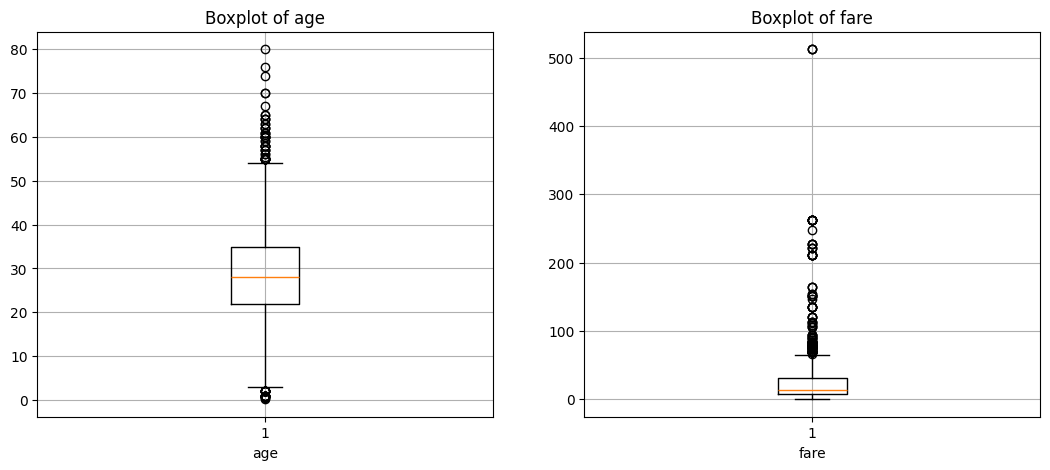

In [26]:
# Handling Outliers in numerical fields

# Visualising numerical fields using boxplots
plt.figure(figsize=(20, 5))

for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.xlabel(col)
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
plt.show()

In [27]:
# Using Robust Scaler to scale as it has lot of outliers
scaler = RobustScaler()

scaled_num_cols = ['age_scaled', 'fare_scaled']
data[scaled_num_cols] = scaler.fit_transform(data[num_cols])

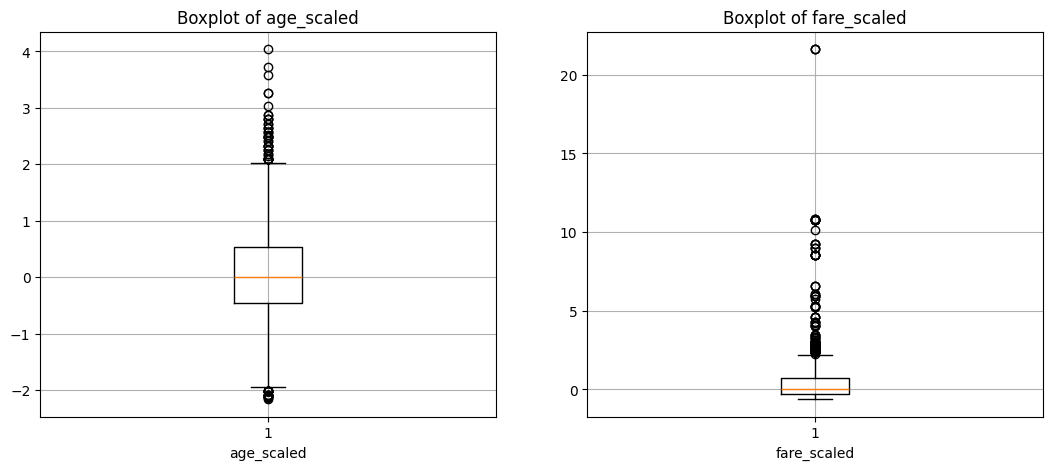

In [28]:
# The range of numerical fetures is scaled down to appropriate range
plt.figure(figsize=(20, 5))

for i, col in enumerate(scaled_num_cols):
    plt.subplot(1, 3, i+1)
    plt.boxplot(data[col])
    plt.xlabel(col)
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
plt.show()

In [29]:
# Analysing categorical columns
for col in cat_cols:
    print(data[col].value_counts(dropna=False), end='\n\n')

pclass
3    478
1    206
2    166
Name: count, dtype: int64

sex
male      551
female    299
Name: count, dtype: int64

sibsp
0    573
1    213
2     25
4     14
3     12
8      8
5      5
Name: count, dtype: int64

parch
0    651
1    113
2     72
4      5
3      3
5      3
9      2
6      1
Name: count, dtype: int64

cabin
Unknown            659
B57 B59 B63 B66      4
C22 C26              4
B96 B98              4
G6                   4
                  ... 
C46                  1
E31                  1
C93                  1
C39                  1
B37                  1
Name: count, Length: 136, dtype: int64

embarked
S    590
C    176
Q     84
Name: count, dtype: int64

survived
0    537
1    313
Name: count, dtype: int64



In [30]:
# Feature Engineering new column for cabin class with 'U' as 'Unknown'
data['cabin_class'] = data['cabin'].str.get(0)
data['cabin_class'].value_counts()

cabin_class
U    659
C     62
B     45
D     31
E     24
F     12
A     12
G      4
T      1
Name: count, dtype: int64

In [31]:
# One Hot Encoding sex, embarked, cabin_class fields

encode_cols = ['sex', 'embarked', 'cabin_class']
ohe = OneHotEncoder(sparse_output=False)

ohe_encoded = ohe.fit_transform(data[encode_cols])

encoded_cols = ohe.get_feature_names_out(encode_cols)
data[encoded_cols] = pd.DataFrame(ohe_encoded, columns=encoded_cols)
data

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,embarked_S,cabin_class_A,cabin_class_B,cabin_class_C,cabin_class_D,cabin_class_E,cabin_class_F,cabin_class_G,cabin_class_T,cabin_class_U
0,1216,3,"Smyth, Miss. Julia",female,28.0,0,0,335432,7.7333,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,Unknown,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,Unknown,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,Unknown,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,Unknown,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,Unknown,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,Unknown,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
# Analysing the fare ranges and the number of passengers

bin_count = 50
for i in range(0, 1000, bin_count):
	print(f'{i} to {i+bin_count}: {data[(data['fare'] > i) & (data['fare'] <= i+bin_count)]['fare'].count()}')

0 to 50: 675
50 to 100: 107
100 to 150: 20
150 to 200: 10
200 to 250: 15
250 to 300: 9
300 to 350: 0
350 to 400: 0
400 to 450: 0
450 to 500: 0
500 to 550: 3
550 to 600: 0
600 to 650: 0
650 to 700: 0
700 to 750: 0
750 to 800: 0
800 to 850: 0
850 to 900: 0
900 to 950: 0
950 to 1000: 0


In [33]:
# Feature Engineering new column for fare_classes
# 0-50: 4th, 50-200: 3rd, 200-400: 2nd, 400-600: 1st

fare_classes = ['4th', '3rd', '2nd', '1st']
bins = [0, 50, 200, 400, 600]

data['fare_class'] = pd.cut(data['fare'], bins=bins, labels=fare_classes, right=False)
data['fare_class'].value_counts()

fare_class
4th    684
3rd    139
2nd     24
1st      3
Name: count, dtype: int64

In [34]:
# Feature Engineering new column family_size with total no.of parents, siblings, children, spouse and passenger
data['family_size'] = data['parch'] + data['sibsp'] + 1
data

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,...,cabin_class_B,cabin_class_C,cabin_class_D,cabin_class_E,cabin_class_F,cabin_class_G,cabin_class_T,cabin_class_U,fare_class,family_size
0,1216,3,"Smyth, Miss. Julia",female,28.0,0,0,335432,7.7333,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4th,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4th,1
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4th,3
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4th,5
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4th,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3rd,1
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4th,1
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4th,2
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,Unknown,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4th,3


<Axes: >

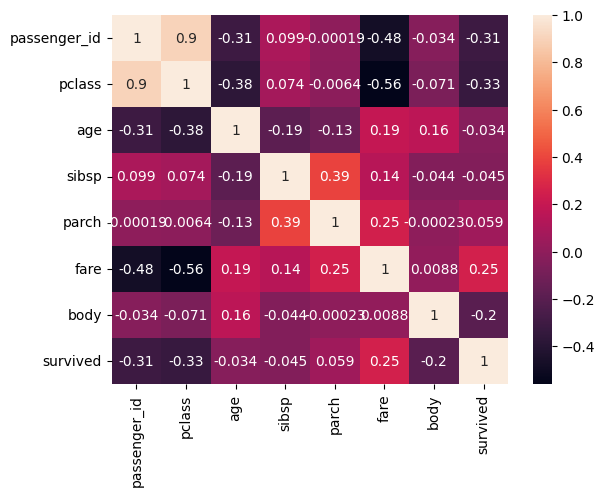

In [35]:
# Analysing correlation of numeric fields with each other on heatmap
corr = data[cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True)

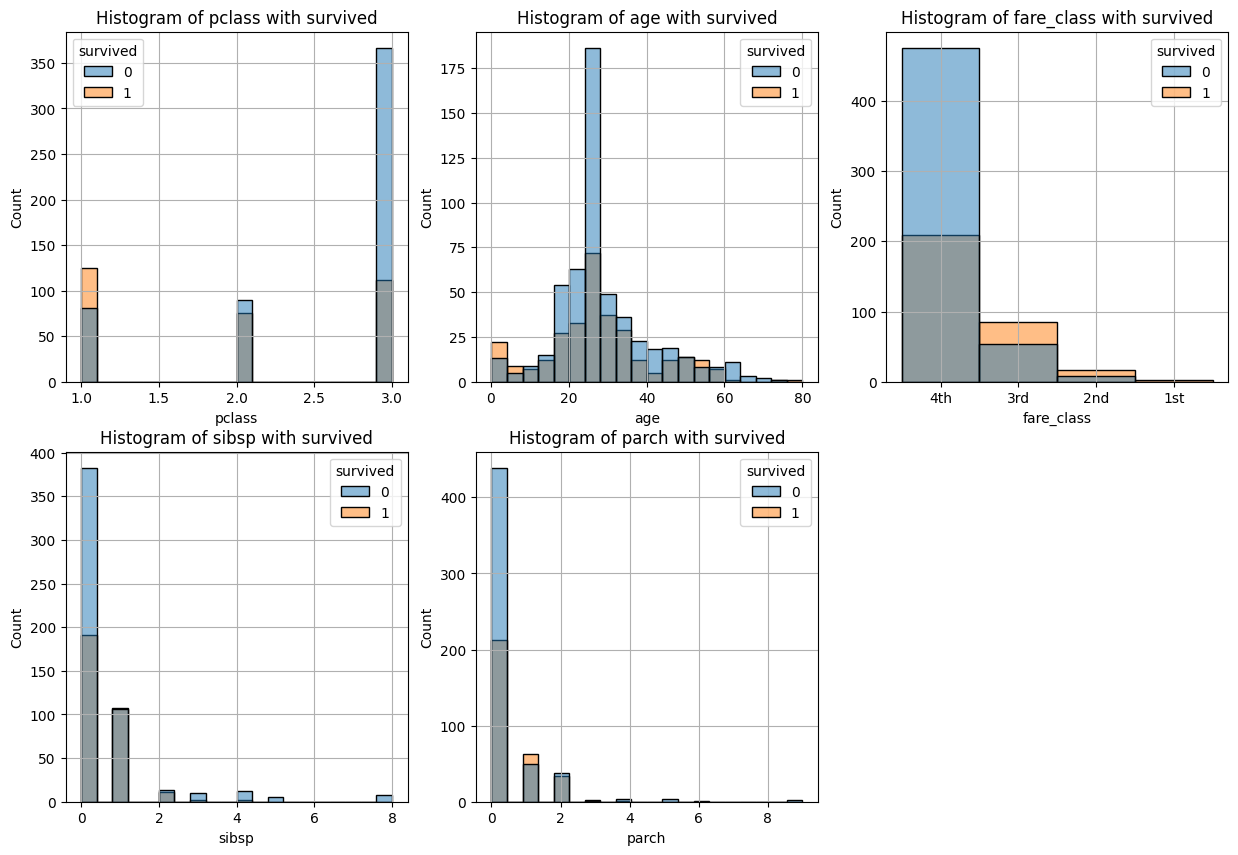

In [36]:
# Histogram of numeric cols with survived
hist_cols = ['pclass', 'age', 'fare_class', 'sibsp', 'parch']
plt.figure(figsize=(15,10))

for i, col in enumerate(hist_cols):
    plt.subplot(2,3,i+1)
    sns.histplot(data=data, x=col, bins=20, hue='survived')
    plt.xlabel(col)
    plt.grid(True)
    plt.title(f'Histogram of {col} with survived')
plt.show()

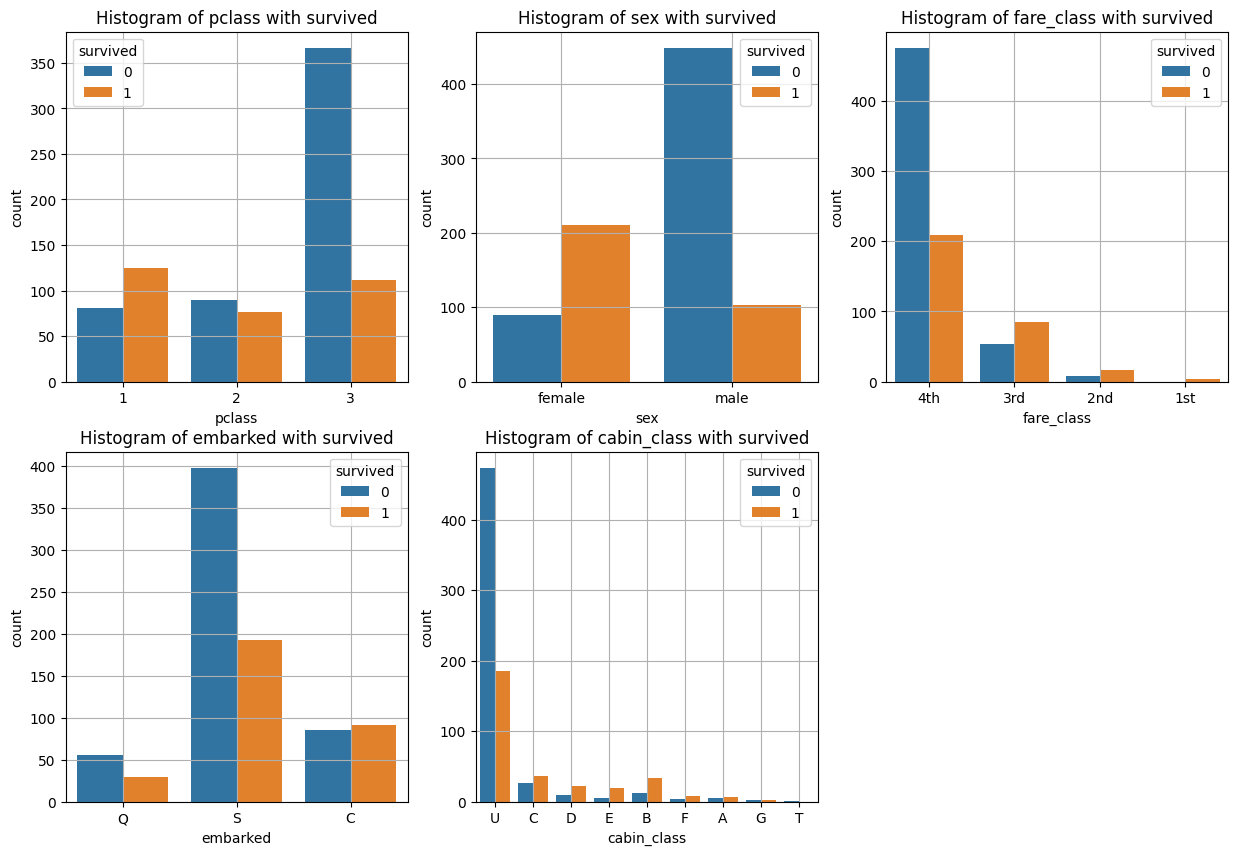

In [37]:
# Count plots of numeric fields with survived
count_cols = ['pclass', 'sex', 'fare_class', 'embarked', 'cabin_class']
plt.figure(figsize=(15,10))

for i, col in enumerate(count_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(data=data, x=col, hue='survived')
    plt.xlabel(col)
    plt.grid(True)
    plt.title(f'Histogram of {col} with survived')
plt.show()

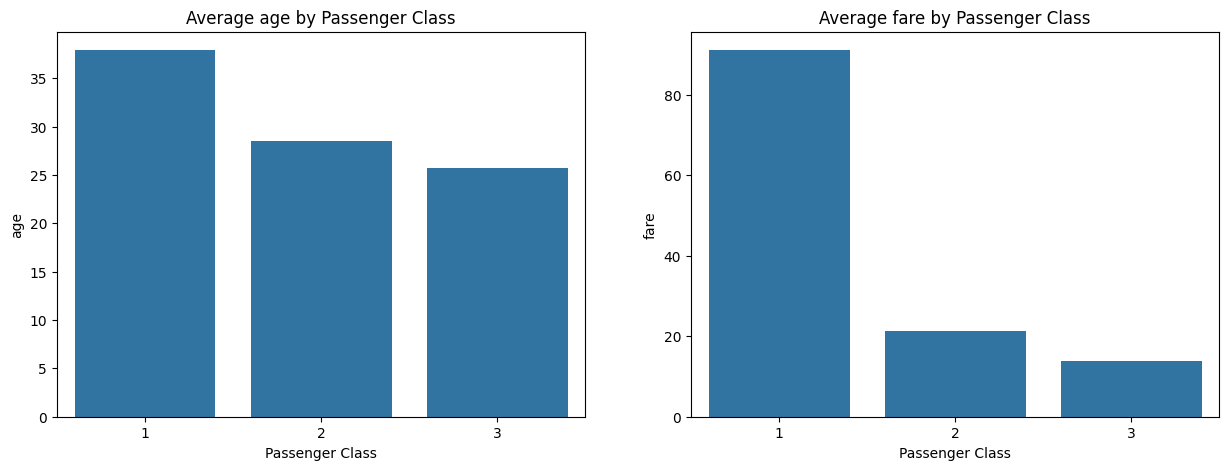

In [38]:
# Barplot of average age, fare per class
plt.figure(figsize=(15,5))

for i, col in enumerate(num_cols):
	plt.subplot(1,2,i+1)
	sns.barplot(x='pclass', y=col, data=data, errorbar=None)
	plt.title(f'Average {col} by Passenger Class')
	plt.xlabel('Passenger Class')
	plt.ylabel(col)
plt.show()

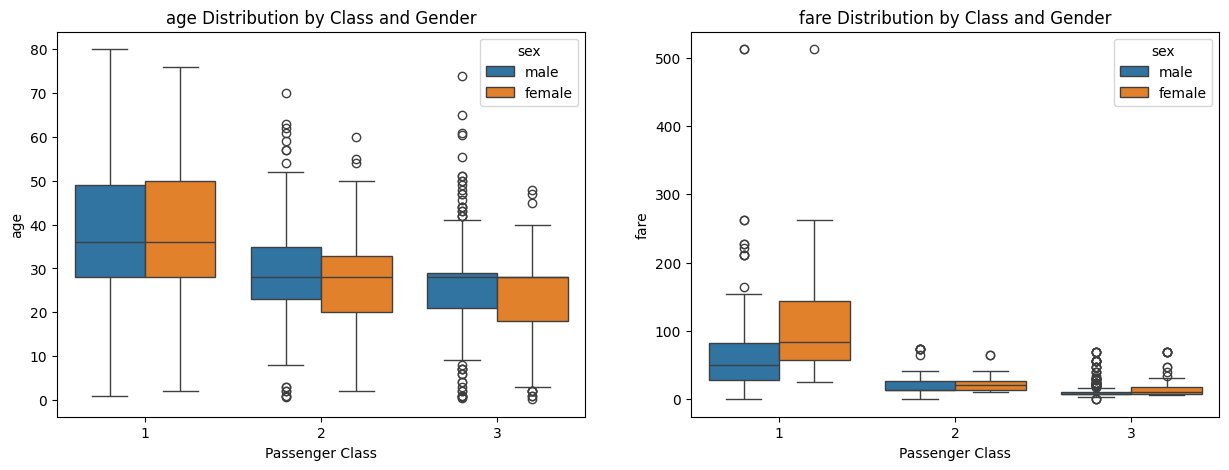

In [39]:
# Boxplot of age, fare distribution by class and sex

plt.figure(figsize=(15,5))

for i, col in enumerate(num_cols):
	plt.subplot(1,2,i+1)
	sns.boxplot(x='pclass', y=col, hue='sex', data=data)
	plt.title(f'{col} Distribution by Class and Gender')
	plt.xlabel('Passenger Class')
	plt.ylabel(col)
plt.show()

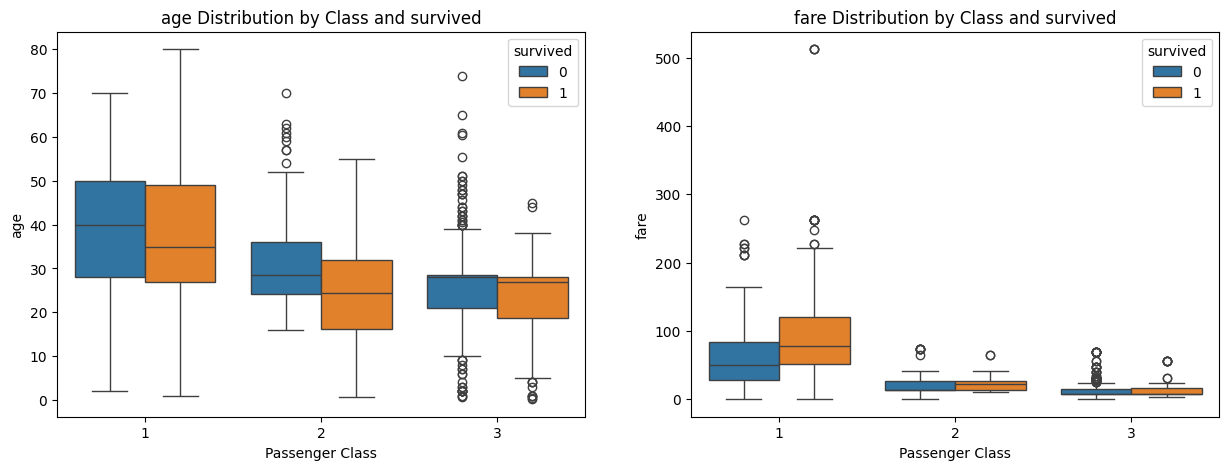

In [40]:
# Boxplot of age, fare distribution by class and survived

plt.figure(figsize=(15,5))

for i, col in enumerate(num_cols):
	plt.subplot(1,2,i+1)
	sns.boxplot(x='pclass', y=col, hue='survived', data=data)
	plt.title(f'{col} Distribution by Class and survived')
	plt.xlabel('Passenger Class')
	plt.ylabel(col)
plt.show()

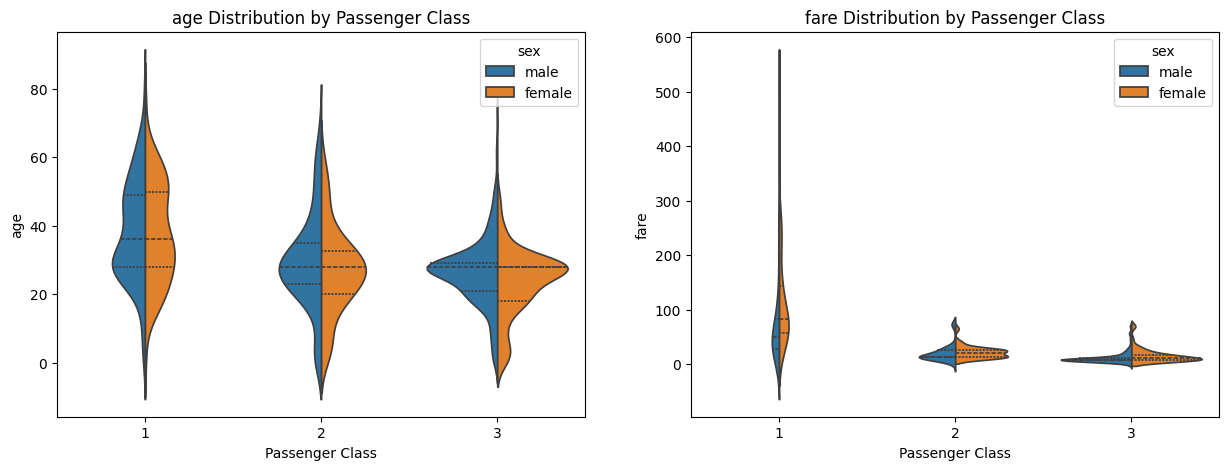

In [41]:
# Violin Plot of age and fare distribution by class and gender

plt.figure(figsize=(15,5))

for i, col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.violinplot(x='pclass', y=col, hue='sex', data=data, inner='quartile', split=True)
    plt.title(f'{col} Distribution by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel(col)

plt.show()

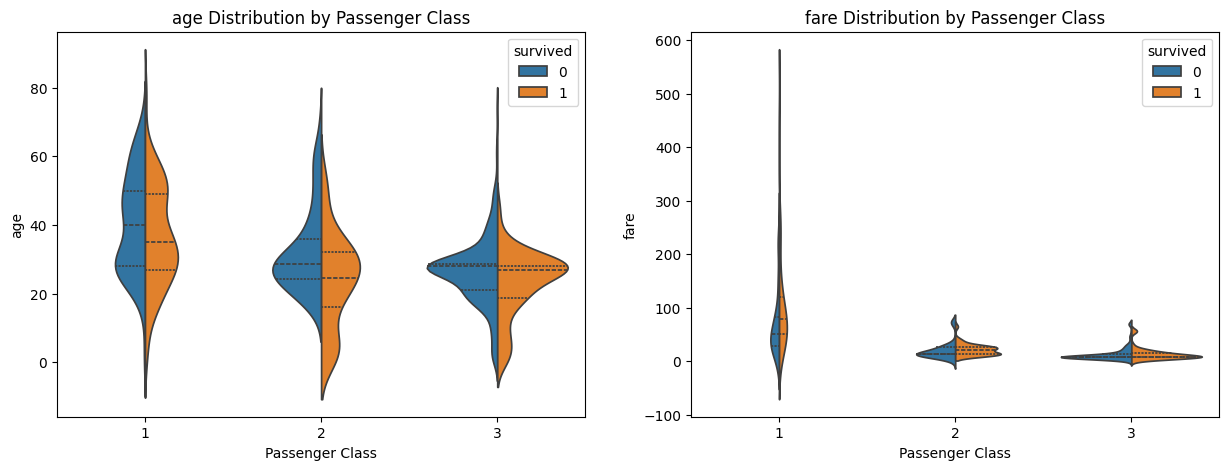

In [42]:
# Violin Plot of age and fare distribution by class and survived

plt.figure(figsize=(15,5))

for i, col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.violinplot(x='pclass', y=col, hue='survived', data=data, inner='quartile', split=True)
    plt.title(f'{col} Distribution by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel(col)

plt.show()

In [43]:
# Finding columns with zero variance
for col in data.select_dtypes(exclude=['object', 'category']).columns:
    if np.var(data[col]) == 0:
        print(f'col with zero variance: {col}')
else:
    print("No columns with zero variance")

No columns with zero variance
